# AI Exploratory Data Analysis Red + White
#### Exploratory Data Analysis

1. The dataset provided is described below 
2. Use basic Python packages for numeric computing and visualization
3. Obtain useful information regarding the dataset

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Read data from csv files
dataRed = pd.read_csv("Data/winequality-red.csv", delimiter = ";")
dataWhite = pd.read_csv("Data/winequality-white.csv", delimiter = ";")
dataFull = pd.concat([dataRed, dataWhite])

## Dataset information
_Citation Request:_
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


In [25]:
# Get info about the dataset
print("Data structure:\n\n" + str(dataFull.head())+"\n\n")
print("Data types:\n\n" + str(dataFull.dtypes))

Data structure:

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

In [26]:
# Get info about the data columns
dataFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [27]:
# Get value counts from some specific columns
print("ALCOHOL: \n", dataFull.alcohol.value_counts(),"\n\n",
      "SULPHATES: \n", dataFull.sulphates.value_counts(),"\n\n",
      "DENSITY: \n", dataFull.density.value_counts(),"\n\n",
      "pH: \n", dataFull.pH.value_counts(),"\n\n",
      "QUALITY: \n", dataFull.quality.value_counts(),
     sep='')

ALCOHOL: 
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
9.233333       1
12.333333      1
13.133333      1
11.466667      1
11.550000      1
Name: alcohol, Length: 111, dtype: int64

SULPHATES: 
0.50    276
0.46    243
0.54    235
0.44    232
0.38    214
       ... 
1.59      1
1.20      1
1.34      1
1.26      1
1.09      1
Name: sulphates, Length: 111, dtype: int64

DENSITY: 
0.99720    69
0.99760    69
0.99800    64
0.99200    64
0.99280    63
           ..
0.99631     1
1.00022     1
1.00055     1
0.99065     1
0.99852     1
Name: density, Length: 998, dtype: int64

pH: 
3.16    200
3.14    193
3.22    185
3.20    176
3.15    170
       ... 
2.82      1
2.72      1
2.77      1
3.85      1
3.81      1
Name: pH, Length: 108, dtype: int64

QUALITY: 
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


#### Let's take a closer look at the value distribution of the data

In [28]:
dataFull.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Let's check data correlation

In [29]:
# dataFull.corr

# Let's plot quality vs variables to see if we can identify any trend

## Let's plot Full dataset, Red wine and White wine

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

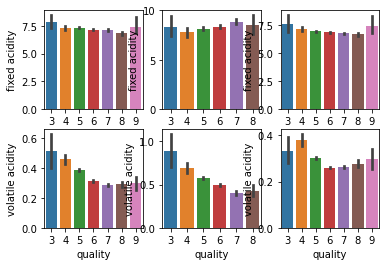

In [30]:
fig, axes = plt.subplots(2, 3)

sns.barplot(x = 'quality', y = 'fixed acidity', data = dataFull, ax = axes[0, 0])
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataRed, ax = axes[0, 1])
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataWhite, ax = axes[0, 2])
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataFull, ax = axes[1, 0])
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataRed, ax = axes[1, 1])
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataWhite, ax = axes[1, 2])


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

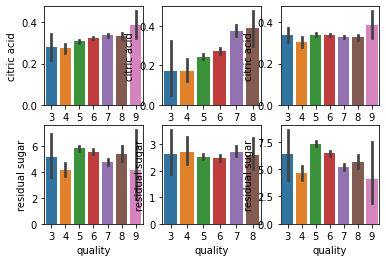

In [31]:
fig, axes = plt.subplots(2, 3)

sns.barplot(x = 'quality', y = 'citric acid', data = dataFull, ax = axes[0, 0])
sns.barplot(x = 'quality', y = 'citric acid', data = dataRed, ax = axes[0, 1])
sns.barplot(x = 'quality', y = 'citric acid', data = dataWhite, ax = axes[0, 2])
sns.barplot(x = 'quality', y = 'residual sugar', data = dataFull, ax = axes[1, 0])
sns.barplot(x = 'quality', y = 'residual sugar', data = dataRed, ax = axes[1, 1])
sns.barplot(x = 'quality', y = 'residual sugar', data = dataWhite, ax = axes[1, 2])

<AxesSubplot:xlabel='quality', ylabel='density'>

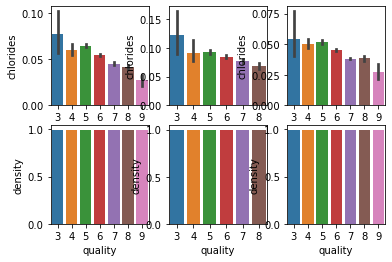

In [32]:
fig, axes = plt.subplots(2, 3)

sns.barplot(x = 'quality', y = 'chlorides', data = dataFull, ax = axes[0, 0])
sns.barplot(x = 'quality', y = 'chlorides', data = dataRed, ax = axes[0, 1])
sns.barplot(x = 'quality', y = 'chlorides', data = dataWhite, ax = axes[0, 2])
sns.barplot(x = 'quality', y = 'density', data = dataFull, ax = axes[1, 0])
sns.barplot(x = 'quality', y = 'density', data = dataRed, ax = axes[1, 1])
sns.barplot(x = 'quality', y = 'density', data = dataWhite, ax = axes[1, 2])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

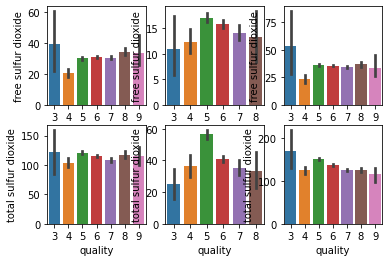

In [33]:
fig, axes = plt.subplots(2, 3)

sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataFull, ax = axes[0, 0])
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataRed, ax = axes[0, 1])
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataWhite, ax = axes[0, 2])
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataFull, ax = axes[1, 0])
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataRed, ax = axes[1, 1])
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataWhite, ax = axes[1, 2])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

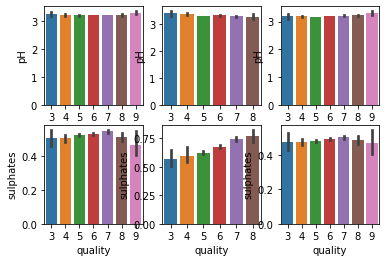

In [34]:
fig, axes = plt.subplots(2, 3)

sns.barplot(x = 'quality', y = 'pH', data = dataFull, ax = axes[0, 0])
sns.barplot(x = 'quality', y = 'pH', data = dataRed, ax = axes[0, 1])
sns.barplot(x = 'quality', y = 'pH', data = dataWhite, ax = axes[0, 2])
sns.barplot(x = 'quality', y = 'sulphates', data = dataFull, ax = axes[1, 0])
sns.barplot(x = 'quality', y = 'sulphates', data = dataRed, ax = axes[1, 1])
sns.barplot(x = 'quality', y = 'sulphates', data = dataWhite, ax = axes[1, 2])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

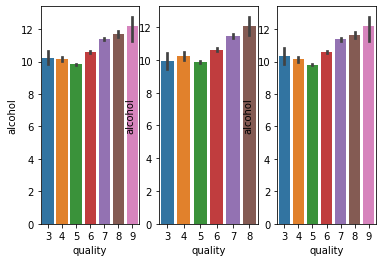

In [35]:
fig, axes = plt.subplots(1, 3)

sns.barplot(x = 'quality', y = 'alcohol', data = dataFull, ax = axes[0])
sns.barplot(x = 'quality', y = 'alcohol', data = dataRed, ax = axes[1])
sns.barplot(x = 'quality', y = 'alcohol', data = dataWhite, ax = axes[2])

#### We can see that for the full dataset, quality improves when:
- volatile acidity goes down (specially in Red wine)
- citric acid goes higher (specially in Red wine)
- chlorides go down
- sulfates go up (only in Red wine)
- alcohol goes up

###### We can examine the distribution of each column in the data using pandas crosstab

In [36]:
quality = pd.crosstab(index= dataRed["quality"],columns='count')

In [37]:
print(quality)

col_0    count
quality       
3           10
4           53
5          681
6          638
7          199
8           18


###### Now let's visualize what we obtained

<Figure size 4608x2304 with 0 Axes>

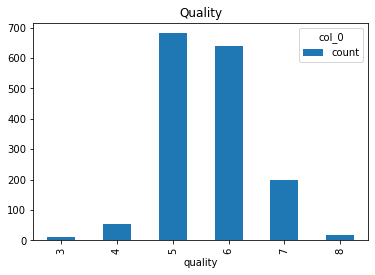

In [38]:
fig = plt.figure(figsize=(64,32))
quality.plot(kind="bar", title ="Quality", stacked=False)
plt.show()

## Preprocessing Data for performing Machine learning algorithms

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [40]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 9.5)
group_names = ['bad', 'good']
# calidad = dataFull['quality']
dataFull['quality'] = pd.cut(dataFull['quality'], bins = bins, labels = group_names)
dataRed['quality'] = pd.cut(dataRed['quality'], bins = bins, labels = group_names)
dataWhite['quality'] = pd.cut(dataWhite['quality'], bins = bins, labels = group_names)

In [41]:
# Now lets assign labels to our quality variable
label_quality = LabelEncoder()

In [42]:
# Bad becomes 0 and good becomes 1 
# dataFull['quality'] = label_quality.fit_transform(dataFull['quality'])
dataFull['quality'] = label_quality.fit_transform(dataFull['quality'])
dataRed['quality'] = label_quality.fit_transform(dataRed['quality'])
dataWhite['quality'] = label_quality.fit_transform(dataWhite['quality'])

In [43]:
print('Full dataset: \n', dataFull['quality'].value_counts())
print('Red wine: \n', dataRed['quality'].value_counts())
print('White wine: \n', dataWhite['quality'].value_counts())

Full dataset: 
 0    5220
1    1277
Name: quality, dtype: int64
Red wine: 
 0    1382
1     217
Name: quality, dtype: int64
White wine: 
 0    3838
1    1060
Name: quality, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

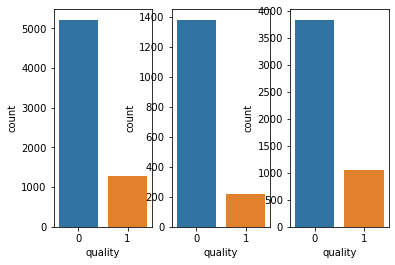

In [44]:
# sns.countplot(dataFull['quality'])

fig, axes = plt.subplots(1, 3)

sns.countplot(dataFull['quality'], ax = axes[0])
sns.countplot(dataRed['quality'], ax = axes[1])
sns.countplot(dataWhite['quality'], ax = axes[2])

In [45]:
# Let's separate data set as features and response
yFull = dataFull['quality']
xFull = dataFull.drop('quality', axis = 1)

xFull = xFull.drop('density', axis = 1)
xFull = xFull.drop('pH', axis = 1)

yRed = dataRed['quality']
xRed = dataRed.drop('quality', axis = 1)

xRed = xRed.drop('density', axis = 1)
xRed = xRed.drop('pH', axis = 1)

yWhite = dataWhite['quality']
xWhite = dataWhite.drop('quality', axis = 1)

xWhite = xWhite.drop('density', axis = 1)
xWhite = xWhite.drop('pH', axis = 1)

In [47]:
# Splitting data set into Train and Test (20% data for test) 
xF_train, xF_test, yF_train, yF_test = train_test_split(xFull, yFull, 
                                                        test_size = 0.2, random_state = 42)
xR_train, xR_test, yR_train, yR_test = train_test_split(xRed, yRed, 
                                                        test_size = 0.2, random_state = 42)
xW_train, xW_test, yW_train, yW_test = train_test_split(xWhite, yWhite, 
                                                        test_size = 0.2, random_state = 42)

In [48]:
# Scaling info for better results
sc = StandardScaler()

In [49]:
xF_train = sc.fit_transform(xF_train)
xF_test = sc.fit_transform(xF_test)

xR_train = sc.fit_transform(xR_train)
xR_test = sc.fit_transform(xR_test)

xW_train = sc.fit_transform(xW_train)
xW_test = sc.fit_transform(xW_test)

#### Now our data is ready for ML

## Random Forest Classifier

In [50]:
# Full dataset
rfc_Full = RandomForestClassifier(n_estimators=200)
rfc_Full.fit(xF_train, yF_train)
pred_rfc_Full = rfc_Full.predict(xF_test)

In [51]:
# Red wine dataset
rfc_Red = RandomForestClassifier(n_estimators=200)
rfc_Red.fit(xR_train, yR_train)
pred_rfc_Red = rfc_Red.predict(xR_test)

In [52]:
# White wine dataset
rfc_White = RandomForestClassifier(n_estimators=200)
rfc_White.fit(xW_train, yW_train)
pred_rfc_White = rfc_White.predict(xW_test)

In [53]:
# Let's check our prediction with real quality

print('\n\nFull dataset')
print(classification_report(yF_test, pred_rfc_Full))

print('\n\nRed wine')
print(classification_report(yR_test, pred_rfc_Red))

print('\n\nWhite wine')
print(classification_report(yW_test, pred_rfc_White))



Full dataset
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1048
           1       0.81      0.50      0.62       252

    accuracy                           0.88      1300
   macro avg       0.85      0.74      0.77      1300
weighted avg       0.87      0.88      0.87      1300



Red wine
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.74      0.43      0.54        47

    accuracy                           0.89       320
   macro avg       0.82      0.70      0.74       320
weighted avg       0.88      0.89      0.88       320



White wine
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       753
           1       0.81      0.59      0.68       227

    accuracy                           0.87       980
   macro avg       0.85      0.77      0.80       980
weighted avg       0.87      0.87  

#### We see that RF precision is 87%, but it works better for white wines, and for bad quality wines in general. Maybe it's because we have much more 'bad' wines and therefore training worked better

In [54]:
#Confusion matrix for the random forest classification
print('\n\nFull dataset:')
print(confusion_matrix(yF_test, pred_rfc_Full))

print('\n\nRed wine:')
print(confusion_matrix(yR_test, pred_rfc_Red))

print('\n\nWhite wine:')
print(confusion_matrix(yW_test, pred_rfc_White))



Full dataset:
[[1018   30]
 [ 126  126]]


Red wine:
[[266   7]
 [ 27  20]]


White wine:
[[722  31]
 [ 94 133]]


## Stochastic Gradient Descent Classifier

In [55]:
sgd_Full = SGDClassifier(penalty=None)
sgd_Full.fit(xF_train, yF_train)
pred_sgd_Full = sgd_Full.predict(xF_test)

sgd_Red = SGDClassifier(penalty=None)
sgd_Red.fit(xR_train, yR_train)
pred_sgd_Red = sgd_Red.predict(xR_test)

sgd_White = SGDClassifier(penalty=None)
sgd_White.fit(xW_train, yW_train)
pred_sgd_White = sgd_White.predict(xW_test)

In [56]:
print('\n\nFull Dataset:')
print(classification_report(yF_test, pred_sgd_Full))

print('\n\nRed wine:')
print(classification_report(yR_test, pred_sgd_Red))

print('\n\nWhite wine:')
print(classification_report(yW_test, pred_sgd_White))



Full Dataset:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1048
           1       0.66      0.19      0.30       252

    accuracy                           0.82      1300
   macro avg       0.75      0.58      0.60      1300
weighted avg       0.80      0.82      0.78      1300



Red wine:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       273
           1       0.57      0.09      0.15        47

    accuracy                           0.86       320
   macro avg       0.72      0.54      0.53       320
weighted avg       0.82      0.86      0.81       320



White wine:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       753
           1       0.56      0.30      0.39       227

    accuracy                           0.78       980
   macro avg       0.69      0.62      0.63       980
weighted avg       0.76      0.7

In [57]:
# Confusion matric for stochastic gradient descent

print('\n\nFull dataset:')
print(confusion_matrix(yF_test, pred_sgd_Full))

print('\n\nRed wine:')
print(confusion_matrix(yR_test, pred_sgd_Red))

print('\n\nWhite wine:')
print(confusion_matrix(yW_test, pred_sgd_White))



Full dataset:
[[1023   25]
 [ 204   48]]


Red wine:
[[270   3]
 [ 43   4]]


White wine:
[[698  55]
 [158  69]]


#### Again results for 'good' wines are really worse than for 'bad' wine. The Random Forest provided better results

## Support Vector Classifier

In [58]:
svc_Full = SVC()
svc_Full.fit(xF_train, yF_train)
pred_svc_Full = svc_Full.predict(xF_test)

svc_Red = SVC()
svc_Red.fit(xR_train, yR_train)
pred_svc_Red = svc_Red.predict(xR_test)

svc_White = SVC()
svc_White.fit(xW_train, yW_train)
pred_svc_White = svc_White.predict(xW_test)

In [59]:
print('\n\nFull dataset:')
print(classification_report(yF_test, pred_svc_Full))

print('\n\nRed wine:')
print(classification_report(yR_test, pred_svc_Red))

print('\n\nWhite wine:')
print(classification_report(yW_test, pred_svc_White))



Full dataset:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1048
           1       0.73      0.25      0.37       252

    accuracy                           0.84      1300
   macro avg       0.79      0.61      0.64      1300
weighted avg       0.82      0.84      0.80      1300



Red wine:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.79      0.23      0.36        47

    accuracy                           0.88       320
   macro avg       0.83      0.61      0.65       320
weighted avg       0.87      0.88      0.85       320



White wine:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       753
           1       0.72      0.30      0.42       227

    accuracy                           0.81       980
   macro avg       0.77      0.63      0.65       980
weighted avg       0.80      0.8

In [60]:
# Confusion matric for stochastic gradient descent
print('\n\nFull dataset:')
print(confusion_matrix(yF_test, pred_svc_Full))

print('\n\nRed wine:')
print(confusion_matrix(yR_test, pred_svc_Red))

print('\n\nWhite wine:')
print(confusion_matrix(yW_test, pred_svc_White))



Full dataset:
[[1025   23]
 [ 189   63]]


Red wine:
[[270   3]
 [ 36  11]]


White wine:
[[727  26]
 [160  67]]


# Let's try to increase our accuracy of models

## Finding best parameters for Support Vector Classifier

In [61]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [62]:
# Full dataset
grid_svc_Full = GridSearchCV(svc_Full, param_grid=param, scoring='accuracy', cv=10)

In [40]:
# Red wine
grid_svc_Red = GridSearchCV(svc_Red, param_grid=param, scoring='accuracy', cv=10)

In [41]:
# white wine
grid_svc_White = GridSearchCV(svc_White, param_grid=param, scoring='accuracy', cv=10)

In [42]:
grid_svc_Full.fit(xF_train, yF_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [43]:
grid_svc_Red.fit(xR_train, yR_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [44]:
grid_svc_White.fit(xW_train, yW_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [45]:
# Best parameters for our svc model
print('\n\nFull dataset')
grid_svc_Full.best_params_



Full dataset


{'C': 1.2, 'gamma': 1.4, 'kernel': 'rbf'}

In [46]:
print('\n\nRed wine')
grid_svc_Red.best_params_



Red wine


{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [47]:
print('\n\nWhite wine')
grid_svc_White.best_params_



White wine


{'C': 1.4, 'gamma': 1.1, 'kernel': 'rbf'}

In [48]:
# Now we run again SVC again with best parameters we've got

print('\n\nFull dataset')
svc2_Full = SVC(C = 1.2, gamma =  1.4, kernel= 'rbf')
svc2_Full.fit(xF_train, yF_train)
pred_svc2_Full = svc2_Full.predict(xF_test)
print(classification_report(yF_test, pred_svc2_Full))



Full dataset
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1048
           1       0.85      0.48      0.61       252

    accuracy                           0.88      1300
   macro avg       0.87      0.73      0.77      1300
weighted avg       0.88      0.88      0.87      1300



In [49]:
print('\n\nRed wine')
svc2_Red = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2_Red.fit(xR_train, yR_train)
pred_svc2_Red = svc2_Red.predict(xR_test)
print(classification_report(yR_test, pred_svc2_Red))



Red wine
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [50]:
print('\n\nWhite wine')
svc2_White = SVC(C = 1.4, gamma =  1.1, kernel= 'rbf')
svc2_White.fit(xW_train, yW_train)
pred_svc2_White = svc2_White.predict(xW_test)
print(classification_report(yW_test, pred_svc2_White))



White wine
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       753
           1       0.84      0.55      0.66       227

    accuracy                           0.87       980
   macro avg       0.86      0.76      0.79       980
weighted avg       0.87      0.87      0.86       980



In [51]:
print('\n\nFull dataset')
print(confusion_matrix(yF_test, pred_svc2_Full))

print('\n\nRed wine')
print(confusion_matrix(yR_test, pred_svc2_Red))

print('\n\nWhite wine')
print(confusion_matrix(yW_test, pred_svc2_White))



Full dataset
[[1026   22]
 [ 131  121]]


Red wine
[[271   2]
 [ 31  16]]


White wine
[[730  23]
 [103 124]]


#### SVC improves from 82% (85%, 71%) to 88% (89%, 85%), althought the confusion matrix for 'good' wine is still mixed

## Cross Validation Score for random forest and SGD

In [52]:
# Let's use cross validation to try to improve random forest model

print('\n\nFull dataset:')
rfc_eval_Full = cross_val_score(estimator = rfc_Full, X = xF_train, y = yF_train, cv = 10)
print(rfc_eval_Full.mean())

print('\n\nRed wine:')
rfc_eval_Red = cross_val_score(estimator = rfc_Red, X = xR_train, y = yR_train, cv = 10)
print(rfc_eval_Red.mean())

print('\n\nWhite wine:')
rfc_eval_White = cross_val_score(estimator = rfc_White, X = xW_train, y = yW_train, cv = 10)
print(rfc_eval_White.mean())



Full dataset:
0.887049429376019


Red wine:
0.9132320374015748


White wine:
0.876462106581763


# Let's check which results we can get dropping some variables

#### Drop some variables. We start only with those that don't show variations
##### Drop: 'density', and 'pH' 

In [55]:
# Let's drop those two columns in x. y remains the same
xFull_den_pH = dataFull.drop('density', axis = 1)
xFull_den_pH = xFull_den_pH.drop('pH', axis = 1)
xRed_den_pH = dataRed.drop('density', axis = 1)
xRed_den_pH = xRed_den_pH.drop('pH', axis = 1)
xWhite_den_pH = dataWhite.drop('density', axis = 1)
xWhite_den_pH = xWhite_den_pH.drop('pH', axis = 1)

In [57]:
# Splitting data set into Train and Test (20% data for test) 
xF_den_pH_train, xF_den_pH_test, yF_den_pH_train, yF_den_pH_test = train_test_split(xFull_den_pH,
                                                                                    yFull,
                                                                                    test_size = 0.2,
                                                                                    random_state = 42)
xR_den_pH_train, xR_den_pH_test, yR_den_pH_train, yR_den_pH_test = train_test_split(xRed_den_pH,
                                                                                    yRed,
                                                                                    test_size = 0.2,
                                                                                    random_state = 42)
xW_den_pH_train, xW_den_pH_test, yW_den_pH_train, yW_den_pH_test = train_test_split(xWhite_den_pH,
                                                                                    yWhite,
                                                                                    test_size = 0.2,
                                                                                    random_state = 42)

In [58]:
# Scaling info for better results
sc = StandardScaler()

In [60]:
xF_den_pH_train = sc.fit_transform(xF_den_pH_train)
xF_den_pH_test = sc.fit_transform(xF_den_pH_test)

xR_den_pH_train = sc.fit_transform(xR_den_pH_train)
xR_den_pH_test = sc.fit_transform(xR_den_pH_test)

xW_den_pH_train = sc.fit_transform(xW_den_pH_train)
xW_den_pH_test = sc.fit_transform(xW_den_pH_test)

# New Random Forest dropping some variables

In [65]:
# Full dataset
rfc_Full_den_pH = RandomForestClassifier(n_estimators=200)
rfc_Full_den_pH.fit(xF_den_pH_train, yF_den_pH_train)
pred_rfc_Full_den_pH = rfc_Full_den_pH.predict(xF_den_pH_test)

# Red wine dataset
rfc_Red_den_pH = RandomForestClassifier(n_estimators=200)
rfc_Red_den_pH.fit(xR_den_pH_train, yR_den_pH_train)
pred_rfc_Red_den_pH = rfc_Red_den_pH.predict(xR_den_pH_test)

# White wine dataset
rfc_White_den_pH = RandomForestClassifier(n_estimators=200)
rfc_White_den_pH.fit(xW_den_pH_train, yW_den_pH_train)
pred_rfc_White_den_pH = rfc_White_den_pH.predict(xW_den_pH_test)

In [66]:
# Let's check our prediction with real quality

print('\n\nFull dataset')
print(classification_report(yF_den_pH_test, pred_rfc_Full_den_pH))

print('\n\nRed wine')
print(classification_report(yR_den_pH_test, pred_rfc_Red_den_pH))

print('\n\nWhite wine')
print(classification_report(yW_den_pH_test, pred_rfc_White_den_pH))



Full dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       252

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Red wine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        47

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



White wine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       753
           1       1.00      1.00      1.00       227

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00  

In [67]:
#Confusion matrix for the random forest classification
print('\n\nFull dataset:')
print(confusion_matrix(yF_den_pH_test, pred_rfc_Full_den_pH))

print('\n\nRed wine:')
print(confusion_matrix(yR_den_pH_test, pred_rfc_Red_den_pH))

print('\n\nWhite wine:')
print(confusion_matrix(yW_den_pH_test, pred_rfc_White_den_pH))



Full dataset:
[[1048    0]
 [   0  252]]


Red wine:
[[273   0]
 [  0  47]]


White wine:
[[753   0]
 [  0 227]]
